In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [3]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t" ,
                  )
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

****Preprossesing****

Missing value

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data.Income.skew()

6.763487372811116

In [7]:
data.fillna({'Income': data.Income.median()}, inplace=True)

In [8]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

**Duplicate rows**

In [9]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


**Skwed**

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

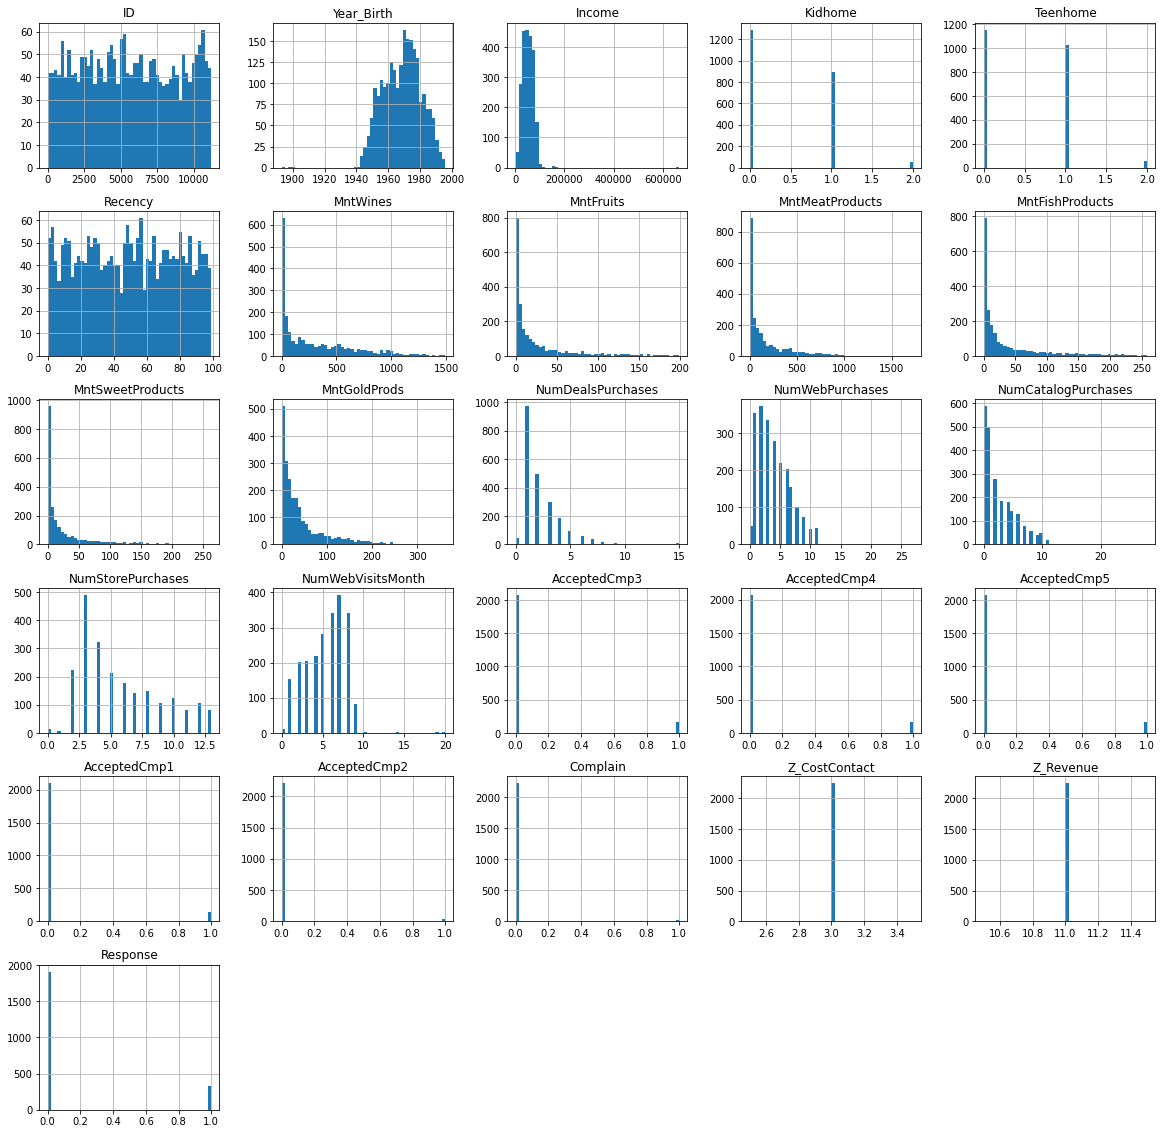

In [10]:
data.hist(figsize = (20,20), bins = 50)

In [11]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

In [14]:
data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,0,1,0,0,0,1,0,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   Dt_Customer              2240 non-null   object 
 6   Recency                  2240 non-null   int64  
 7   MntWines                 2240 non-null   int64  
 8   MntFruits                2240 non-null   int64  
 9   MntMeatProducts          2240 non-null   int64  
 10  MntFishProducts          2240 non-null   int64  
 11  MntSweetProducts         2240 non-null   int64  
 12  MntGoldProds             2240 non-null   int64  
 13  NumDealsPurchases        2240 non-null   int64  
 14  NumWebPurchases         

In [16]:
data.drop(['Dt_Customer', 'ID'],inplace=True, axis = 1)

In [17]:
data_Robus = RobustScaler().fit_transform(data)
data_Robus = pd.DataFrame(data_Robus)
data_Robus.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.722222,0.206299,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.888889,-0.153812,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.277778,0.617737,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.777778,-0.755259,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.611111,0.211032,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


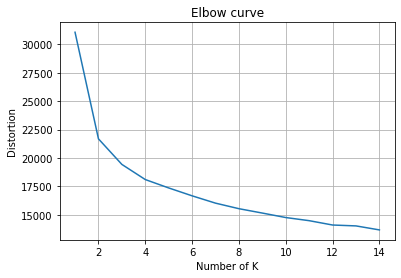

In [18]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_Robus)
    distorsions.append(kmeans.inertia_)

plt.plot(range(1, 15), distorsions)
plt.title('Elbow curve')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.grid()

In [19]:
d1_kmeans = KMeans(n_clusters=4).fit(data_Robus) 
print(silhouette_score(data_Robus, d1_kmeans.labels_ ))

0.18543493946057957


In [20]:
d1_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(data_Robus)
print(silhouette_score(data_Robus, d1_hier.labels_))

0.5560956008669312


In [21]:
d1_dbscan = DBSCAN(eps=1, min_samples=30).fit(data_Robus)
print(silhouette_score(data_Robus, d1_dbscan.labels_))

-0.17427099349576042


In [22]:
d1_gm = GaussianMixture(n_components=2, random_state=0).fit(data_Robus)
print(silhouette_score(data_Robus, d1_gm.predict(data_Robus)))

0.567264379284212


In [23]:
print("K-means: ",silhouette_score(data_Robus, d1_kmeans.labels_ ))
print("Hierarchical: ",silhouette_score(data_Robus, d1_hier.labels_))
print("DBSCAN: ",silhouette_score(data_Robus, d1_dbscan.labels_))
print("GM: ",silhouette_score(data_Robus, d1_gm.predict(data_Robus)))

K-means:  0.18543493946057957
Hierarchical:  0.5560956008669312
DBSCAN:  -0.17427099349576042
GM:  0.567264379284212


In [24]:
silhouette_kmean = []
silhouette_hier = []
silhouette_db = []
silhouette_gm = []
for i in range(2,39):
    df_PCA = PCA(n_components = i, copy = False).fit_transform(data_Robus)
    
    d_kmeans = KMeans(n_clusters=4).fit(df_PCA) 
    silhouette_kmean.append(round(silhouette_score(df_PCA, d_kmeans.labels_ ),4))
    
    d_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
    silhouette_hier.append(round(silhouette_score(df_PCA, d_hier.labels_),4))
    
    d_dbscan = DBSCAN(eps=1, min_samples=30).fit(df_PCA)
    silhouette_db.append(round(silhouette_score(df_PCA, d_dbscan.labels_),4))
    
    d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
    silhouette_gm.append(round(silhouette_score(df_PCA, d_gm.predict(df_PCA)),4))

In [25]:
print("Kmean")
print(silhouette_kmean)
print()
print("Hierarchical")
print(silhouette_hier)
print()
print("DBSCAN")
print(silhouette_db)
print()
print("GM")
print(silhouette_gm)


Kmean
[0.4982, 0.431, 0.3918, 0.3686, 0.3385, 0.3139, 0.2962, 0.2745, 0.257, 0.2437, 0.2341, 0.2259, 0.2194, 0.2166, 0.2123, 0.2086, 0.2046, 0.2013, 0.1977, 0.1955, 0.1927, 0.1909, 0.1899, 0.1888, 0.1886, 0.1878, 0.1874, 0.1859, 0.186, 0.1857, 0.1856, 0.1852, 0.1854, 0.1856, 0.1854, 0.1854, 0.1854]

Hierarchical
[0.4594, 0.3375, 0.378, 0.4974, 0.5105, 0.5418, 0.5425, 0.4808, 0.4986, 0.5592, 0.555, 0.5517, 0.5526, 0.5591, 0.5611, 0.5621, 0.5637, 0.563, 0.5607, 0.5622, 0.5607, 0.5599, 0.5592, 0.5586, 0.5582, 0.5575, 0.5571, 0.5565, 0.5563, 0.5562, 0.5561, 0.5561, 0.5561, 0.5561, 0.5561, 0.5561, 0.5561]

DBSCAN
[0.4627, 0.4295, 0.4043, 0.2538, 0.409, 0.3746, 0.3377, 0.2856, 0.2281, 0.1785, 0.1354, -0.0832, -0.125, -0.1404, -0.1617, -0.1683, -0.1758, -0.1797, -0.1799, -0.1699, -0.1698, -0.1721, -0.1727, -0.1731, -0.1736, -0.174, -0.1745, -0.1741, -0.1742, -0.1742, -0.1742, -0.1743, -0.1743, -0.1743, -0.1743, -0.1743, -0.1743]

GM
[0.4225, 0.4113, 0.3685, 0.3669, 0.3504, 0.3461, 0.3345, 0.5

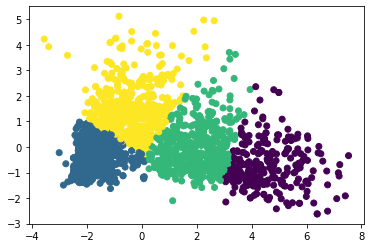

In [26]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Robus))
    
d_kmeans = KMeans(n_clusters=4).fit(df_PCA) 
df_PCA['Cluster'] = d_kmeans.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

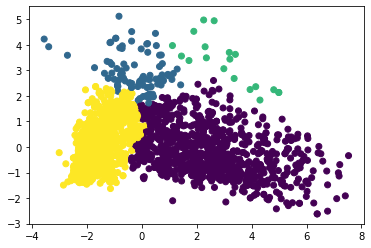

In [27]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Robus))
    
d_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
df_PCA['Cluster'] = d_hier.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

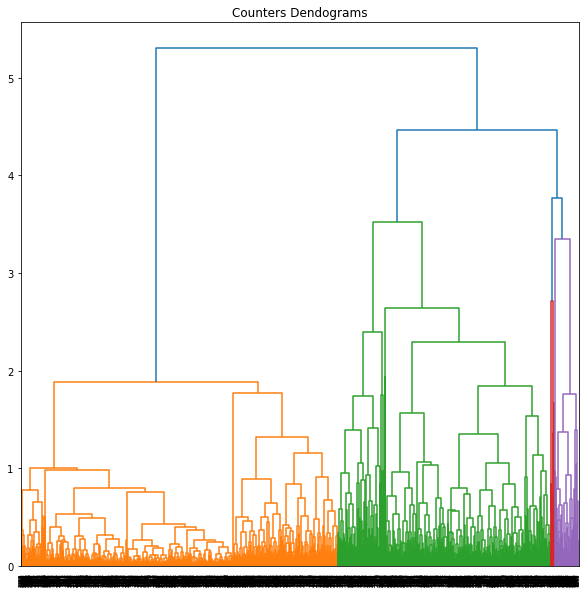

In [28]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend_avg = shc.dendrogram(shc.linkage(y=df_PCA , method='average',metric='euclidean')
                          ,orientation='top') 

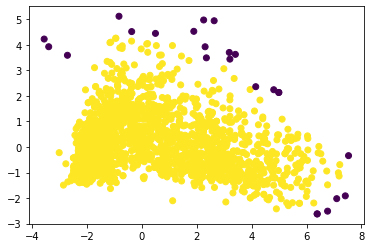

In [29]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Robus))
    
d_dbscan = DBSCAN(eps=1, min_samples=30).fit(df_PCA) 
df_PCA['Cluster'] = d_dbscan.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

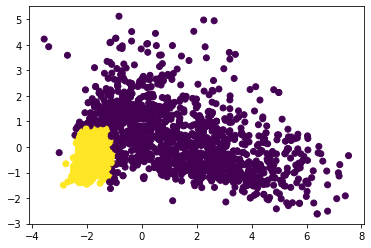

In [30]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Robus))
    
d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
df_PCA['Cluster'] = d_gm.predict(df_PCA)

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

**StandardScaler**

In [31]:
data_Stand = StandardScaler().fit_transform(data)
data_Stand = pd.DataFrame(data_Stand)
data_Stand.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.444816,1.899751,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894


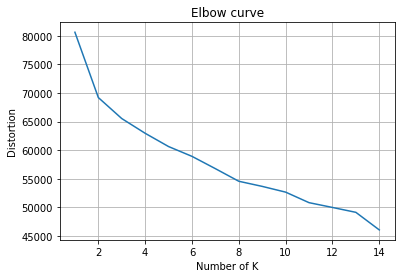

In [32]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_Stand)
    distorsions.append(kmeans.inertia_)

plt.plot(range(1, 15), distorsions)
plt.title('Elbow curve')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.grid()

In [33]:
d2_kmeans = KMeans(n_clusters=14).fit(data_Stand) 
print(silhouette_score(data_Stand, d2_kmeans.labels_ ))

0.13933706551857447


In [34]:
d2_hier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage= 'average').fit(data_Stand)
print(silhouette_score(data_Stand, d2_hier.labels_))

0.7713123467370122


In [35]:
d2_dbscan = DBSCAN(eps=1, min_samples=15).fit(data_Stand)
print(silhouette_score(data_Stand, d2_dbscan.labels_))

-0.1683887590143683


In [36]:
d2_gm = GaussianMixture(n_components=2, random_state=0).fit(data_Stand)
print(silhouette_score(data_Stand, d2_gm.predict(data_Stand)))

0.5305270791982118


In [37]:
print("K-means: ",silhouette_score(data_Stand, d2_kmeans.labels_ ))
print("Hierarchical: ",silhouette_score(data_Stand, d2_hier.labels_))
print("DBSCAN: ",silhouette_score(data_Stand, d2_dbscan.labels_))
print("GM: ",silhouette_score(data_Stand, d2_gm.predict(data_Stand)))

K-means:  0.13933706551857447
Hierarchical:  0.7713123467370122
DBSCAN:  -0.1683887590143683
GM:  0.5305270791982118


In [38]:
silhouette2_kmean = []
silhouette2_hier = []
silhouette2_db = []
silhouette2_gm = []
for i in range(2,39):
    df_PCA = PCA(n_components = i, copy = False).fit_transform(data_Stand)
    
    d_kmeans = KMeans(n_clusters=14).fit(df_PCA) 
    silhouette2_kmean.append(round(silhouette_score(df_PCA, d_kmeans.labels_ ),4))
    
    d_hier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
    silhouette2_hier.append(round(silhouette_score(df_PCA, d_hier.labels_),4))
    
    d_dbscan = DBSCAN(eps=1, min_samples=15).fit(df_PCA)
    silhouette2_db.append(round(silhouette_score(df_PCA, d_dbscan.labels_),4))
    
    d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
    silhouette2_gm.append(round(silhouette_score(df_PCA, d_gm.predict(df_PCA)),4))

In [39]:
print("Kmean")
print(silhouette2_kmean)
print()
print("Hierarchical")
print(silhouette2_hier)
print()
print("DBSCAN")
print(silhouette2_db)
print()
print("GM")
print(silhouette2_gm)


Kmean
[0.3427, 0.2746, 0.2662, 0.2329, 0.2219, 0.1917, 0.1957, 0.1815, 0.1801, 0.1779, 0.171, 0.1747, 0.1704, 0.1728, 0.1721, 0.1652, 0.1478, 0.1433, 0.136, 0.1365, 0.1255, 0.1533, 0.1279, 0.1151, 0.1086, 0.1232, 0.1418, 0.118, 0.1052, 0.0957, 0.0936, 0.1074, 0.0995, 0.0993, 0.0863, 0.1082, 0.1237]

Hierarchical
[0.463, 0.4226, 0.2678, 0.294, 0.4084, 0.3369, 0.3392, 0.3867, 0.4491, 0.4236, 0.4621, 0.4913, 0.7409, 0.741, 0.764, 0.7989, 0.7981, 0.7956, 0.7931, 0.7906, 0.7882, 0.7862, 0.7841, 0.7823, 0.7804, 0.779, 0.7775, 0.776, 0.7747, 0.7736, 0.7727, 0.7719, 0.7713, 0.7713, 0.7713, 0.7713, 0.7713]

DBSCAN
[0.4173, 0.4116, 0.2811, -0.0718, -0.0139, -0.142, -0.1378, -0.0479, -0.0854, -0.0922, -0.1158, -0.1159, -0.1235, -0.123, -0.1299, -0.1389, -0.1787, -0.1604, -0.1834, -0.1893, -0.1981, -0.1962, -0.1993, -0.206, -0.1944, -0.1568, -0.1593, -0.1608, -0.1629, -0.1635, -0.1662, -0.1675, -0.1684, -0.1684, -0.1684, -0.1684, -0.1684]

GM
[0.4601, 0.4319, 0.3661, 0.3242, 0.3004, 0.2745, 0.2584

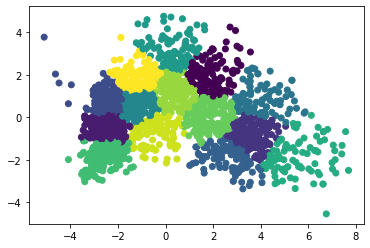

In [40]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Stand))
    
d_kmeans = KMeans(n_clusters=14).fit(df_PCA) 
df_PCA['Cluster'] = d_kmeans.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

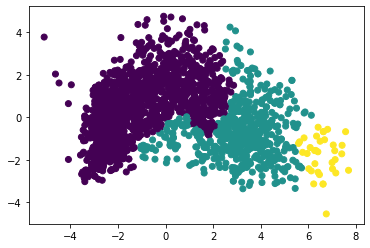

In [41]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Stand))
    
d_hier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
df_PCA['Cluster'] = d_hier.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

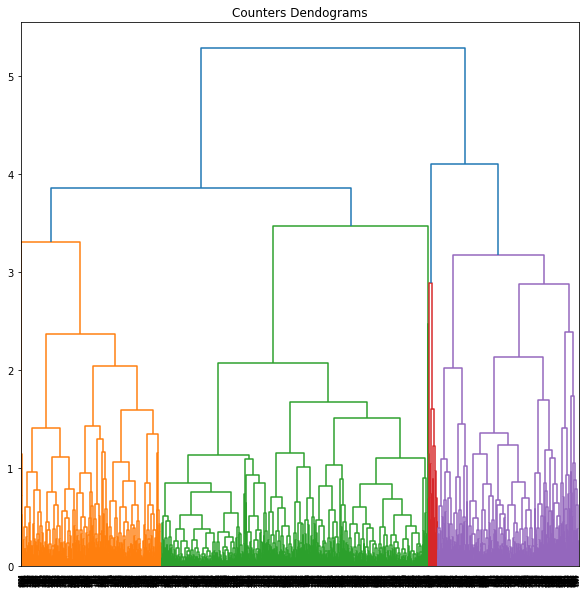

In [42]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend_avg = shc.dendrogram(shc.linkage(y=df_PCA , method='average',metric='euclidean')
                          ,orientation='top') 

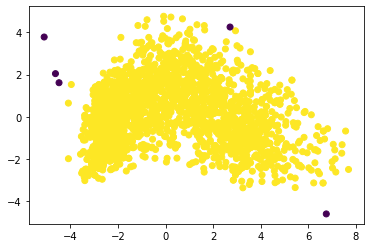

In [43]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Stand))
    
d_dbscan = DBSCAN(eps=1, min_samples=15).fit(df_PCA) 
df_PCA['Cluster'] = d_dbscan.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

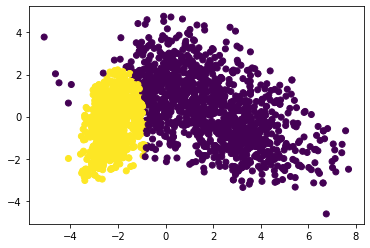

In [44]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(data_Stand))
    
d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
df_PCA['Cluster'] = d_gm.predict(df_PCA)

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])